In [1]:
import pandas as pd
def get_csv_data(video_folder_name, fileName):    
    data = pd.read_csv(fileName, sep=';')
    data.columns = ['ID', 'file_name', 'label']
    file_paths = []
    for entry in data.iloc():
        file_paths.append(video_folder_name + entry['file_name'])
    data['file_path'] = file_paths
    data.set_index('ID', inplace=True, drop=False)
    return data

training = get_csv_data('../WS2020_DeepLearning_Videos/Task1_Training_Validation/', '../Task1_Training_Labels_Videos.csv')
test = get_csv_data('../WS2020_DeepLearning_Videos/Task1_Test/', '../Task1_Test_Labels_Videos.csv')

display(training)
display(test)

,ID,file_name,label,file_path
ID,,,,
1,1,_8Vy3dlHg2w_00000.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
2,2,_8Vy3dlHg2w_00001.mp4,Upwards,../WS2020_DeepLearning_Videos/Task1_Training_V...
3,3,_8Vy3dlHg2w_00002.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Training_V...
4,4,_8Vy3dlHg2w_00003.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
5,5,_8Vy3dlHg2w_00004.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Training_V...
...,...,...,...,...
96,96,_8Vy3dlHg2w_00100.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Training_V...
97,97,_8Vy3dlHg2w_00101.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...
98,98,_8Vy3dlHg2w_00102.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Training_V...


,ID,file_name,label,file_path
ID,,,,
1,1,_8Vy3dlHg2w_00105.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
2,2,_8Vy3dlHg2w_00106.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
3,3,_8Vy3dlHg2w_00108.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
4,4,_8Vy3dlHg2w_00109.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
5,5,_8Vy3dlHg2w_00110.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
6,6,_8Vy3dlHg2w_00111.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
7,7,_8Vy3dlHg2w_00112.mp4,Front,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
8,8,_8Vy3dlHg2w_00113.mp4,Side,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...
9,9,_8Vy3dlHg2w_00114.mp4,Downwards,../WS2020_DeepLearning_Videos/Task1_Test/_8Vy3...


In [2]:
def encode_position(label):
    if label == 'Side':
        return 0
    if label == 'Front':
        return 1
    if label == 'Upwards':
        return 2
    if label == 'Downwards':
        return 3
        

In [3]:
import cv2
import numpy as np
class_names = ['Side', 'Front', 'Upwards', 'Downwards']
def get_frames_labels(data, frames, labels):
    for file in data.iloc():
        file_path = file['file_path']
        video_id = file['ID']
        label = encode_position(data.loc[video_id].label)
        
        # Playing video from file:
        cap = cv2.VideoCapture(file['file_path'])
        success, frame = cap.read()

        while(success):
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frame = cv2.resize(frame, (256,256))
            frames.append(frame)
            labels.append(label)
            # Capture frame by frame
            success, frame = cap.read()

        cap.release()
        cv2.destroyAllWindows()
        # Remove this break when accessing all video files
        
training_frames = []
training_labels = []
test_frames = []
test_labels = []
get_frames_labels(training, training_frames, training_labels)
get_frames_labels(test, test_frames, test_labels)

(7008, 256, 256, 3)
(2238, 256, 256, 3)


array([0, 0, 0, ..., 0, 0, 0])

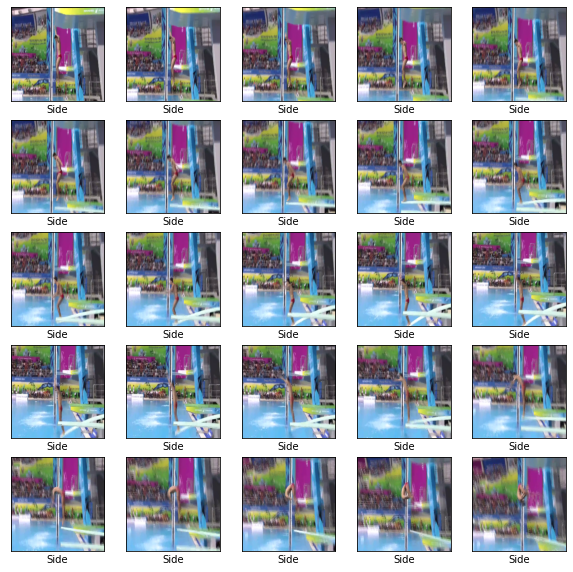

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_images = np.array(training_frames)
train_labels = np.array(training_labels)
test_images = np.array(test_frames)
test_labels = np.array(test_labels)

print(train_images.shape)
print(test_images.shape)
display(train_labels)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
from tensorflow.keras import layers, models, regularizers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256,256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
219/219 [==============================] - 6s 30ms/step - loss: 16.9787 - accuracy: 0.8340 - val_loss: 0.7097 - val_accuracy: 0.7989
Epoch 2/10
219/219 [==============================] - 6s 29ms/step - loss: 0.3018 - accuracy: 0.9043 - val_loss: 0.6730 - val_accuracy: 0.8525
Epoch 3/10
219/219 [==============================] - 6s 29ms/step - loss: 0.1319 - accuracy: 0.9526 - val_loss: 0.5278 - val_accuracy: 0.9196
Epoch 4/10
219/219 [==============================] - 6s 29ms/step - loss: 0.4187 - accuracy: 0.8529 - val_loss: 2.5131 - val_accuracy: 0.6273
Epoch 5/10
219/219 [==============================] - 6s 29ms/step - loss: 0.5333 - accuracy: 0.7977 - val_loss: 0.6111 - val_accuracy: 0.8213
Epoch 6/10
219/219 [==============================] - 6s 29ms/step - loss: 0.2736 - accuracy: 0.8991 - val_loss: 0.1951 - val_accuracy: 0.9526
Epoch 7/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0760 - accuracy: 0.9675 - val_loss: 0.3963 - val_accuracy: 0.937

70/70 - 1s - loss: 0.6565 - accuracy: 0.7802


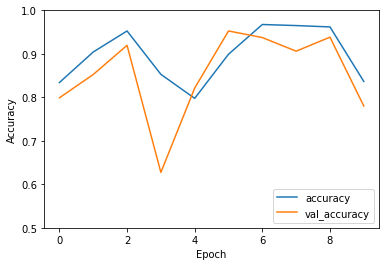

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

1. Input Video handling
2. Layer anpassen

In [36]:
from functools import reduce
def predict_video(path):
    # Playing video from file:
    images_of_video = []
    cap = cv2.VideoCapture(path)
    success, frame = cap.read()

    while(success):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (256,256))
        images_of_video.append(frame)
        # Capture frame by frame
        success, frame = cap.read()
    cap.release()
    cv2.destroyAllWindows()
    
    images_of_video = np.array(images_of_video)
    
    predictions = model.predict(images_of_video)
    
    predicted_labels = [class_names[np.argmax(prediction)] for prediction in predictions]
    
    most_frequent_label = max(set(predicted_labels), key = predicted_labels.count)
    
    mean_score = reduce(
        lambda score_total,prediction:
            score_total+np.max(prediction)
        , predictions)/len(predictions)
    
    frequent_label_index = class_names.index(most_frequent_label)

    print(
        "Video in file {} is most likely shot from {} perspective with a {:.2f} percent confidence."
        .format(path, most_frequent_label, 100 * mean_score[frequent_label_index])
    )
    


predict_video('../WS2020_DeepLearning_Videos/Task2_Test/_tigfCJFLZg_00319.mp4')

Video in file ../WS2020_DeepLearning_Videos/Task2_Test/_tigfCJFLZg_00319.mp4 is most likely shot from Side perspective with a 211.89 percent confidence.


In [26]:
import os
for root, dirs, files in os.walk("../WS2020_DeepLearning_Videos/Task2_Training_Validation/"):
    for filename in files:
        if '.mp4' in filename:
            predict_video(f"../WS2020_DeepLearning_Videos/Task2_Training_Validation/{filename}")

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00150.mp4 is most likely shot from Side perspective with a 330.30 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00054.mp4 is most likely shot from Side perspective with a 501.11 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00264.mp4 is most likely shot from Side perspective with a 391.51 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00273.mp4 is most likely shot from Side perspective with a 806.03 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00016.mp4 is most likely shot from Front perspective with a 714.05 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00145.mp4 is most likely shot from Side perspective with a 709.79 percent con

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00063.mp4 is most likely shot from Side perspective with a 508.72 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00070.mp4 is most likely shot from Side perspective with a 533.76 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00178.mp4 is most likely shot from Side perspective with a 441.60 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00285.mp4 is most likely shot from Side perspective with a 541.97 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00102.mp4 is most likely shot from Side perspective with a 508.40 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00173.mp4 is most likely shot from Side perspective with a 659.77 percent conf

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00146.mp4 is most likely shot from Side perspective with a 604.74 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00212.mp4 is most likely shot from Side perspective with a 264.29 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00151.mp4 is most likely shot from Side perspective with a 671.18 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00209.mp4 is most likely shot from Side perspective with a 881.79 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00086.mp4 is most likely shot from Side perspective with a 638.07 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00205.mp4 is most likely shot from Side perspective with a 650.25 percent conf

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00227.mp4 is most likely shot from Side perspective with a 686.32 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00167.mp4 is most likely shot from Side perspective with a 446.31 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00039.mp4 is most likely shot from Side perspective with a 903.11 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00202.mp4 is most likely shot from Side perspective with a 590.43 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00124.mp4 is most likely shot from Side perspective with a 306.77 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00271.mp4 is most likely shot from Side perspective with a 581.76 percent conf

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00110.mp4 is most likely shot from Side perspective with a 565.87 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00282.mp4 is most likely shot from Side perspective with a 580.17 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00137.mp4 is most likely shot from Side perspective with a 887.84 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00095.mp4 is most likely shot from Side perspective with a 749.98 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00188.mp4 is most likely shot from Side perspective with a 430.54 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_lmT4WlK7G0_00108.mp4 is most likely shot from Side perspective with a 578.43 percent conf

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00083.mp4 is most likely shot from Side perspective with a 1034.91 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00152.mp4 is most likely shot from Side perspective with a 469.80 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00164.mp4 is most likely shot from Side perspective with a 625.90 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00043.mp4 is most likely shot from Side perspective with a 377.49 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00045.mp4 is most likely shot from Side perspective with a 783.15 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00031.mp4 is most likely shot from Side perspective with a 733.51 percent con

Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00286.mp4 is most likely shot from Side perspective with a 611.45 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_8Vy3dlHg2w_00192.mp4 is most likely shot from Side perspective with a 940.68 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00179.mp4 is most likely shot from Side perspective with a 735.72 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00022.mp4 is most likely shot from Side perspective with a 530.85 percent confidence.
Video in file ../WS2020_DeepLearning_Videos/Task2_Training_Validation/_tigfCJFLZg_00152.mp4 is most likely shot from Side perspective with a 679.68 percent confidence.
